<a href="https://colab.research.google.com/github/asimmons1129/Wine-Quality-Predictor-/blob/main/Wine_Quality_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Analysis Model

This notebook will be able to use various Python-based machine learning and data science libraries in an attempt to build a machine learning model that is able to predict the quality of wine based on its components.

Data Origin: https://www.kaggle.com/datasets/rajyellow46/wine-quality

Data Attributes:
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)

## Preparing the tools

We will use pandas, Matplotlib, and NumPy for data analysis and manipulation

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tkinter import *
import seaborn as sns
import joblib

#allow plots to appear inside notebook
%matplotlib inline

#importing models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

#other features
from sklearn.preprocessing import StandardScaler

## Load Data

In [ ]:
#importing csv data
wine_data = pd.read_csv("winequalityN.csv")
#show number of rows and columns
wine_data.shape

(6497, 13)

## Data Exploration

In [ ]:
#displays first 5 rows of dataset
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#displays first 5 columns of dataset
wine_data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
#how many of each classification there are
wine_data["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

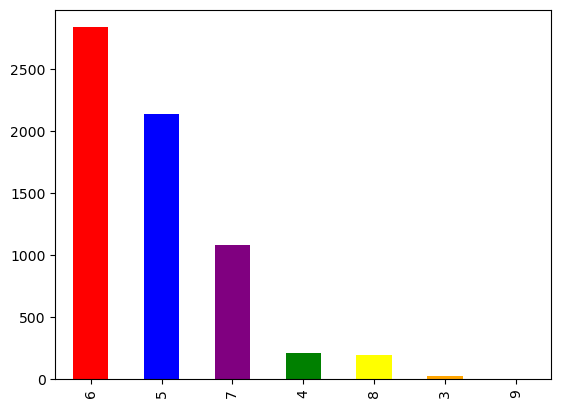

In [ ]:
wine_data["quality"].value_counts().plot(kind = "bar", color = ["red", "blue", "purple", "green", "yellow", "orange", "lightblue"]);

In [ ]:
#display data information such as number of rows, number of columns, column names, and data types
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
#find out if there are any missing values
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
#remove rows with null values
wine_data.dropna(inplace = True)

In [ ]:
#validate removal of null values
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#get overall statistics of dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Find Patterns Within Data
Plotting quality against other individual components to find patterns

In [ ]:
wine_data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

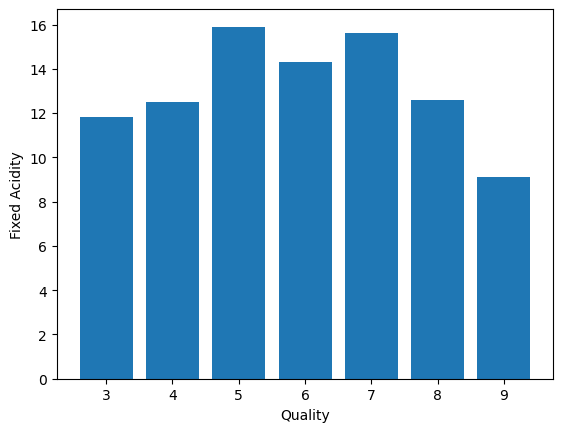

In [ ]:
#quality vs fixed acidity
plt.bar(wine_data['quality'], wine_data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

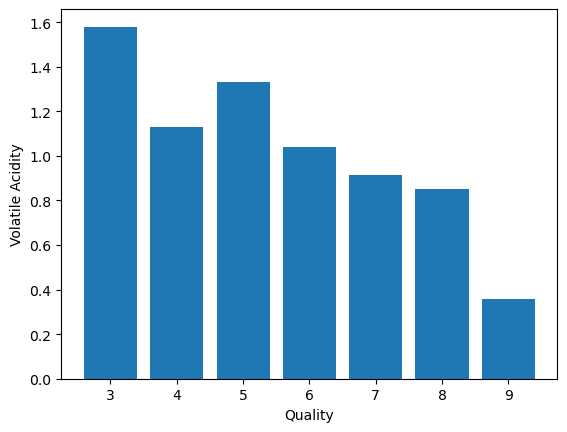

In [ ]:
#quality vs volatile acidity
plt.bar(wine_data['quality'], wine_data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

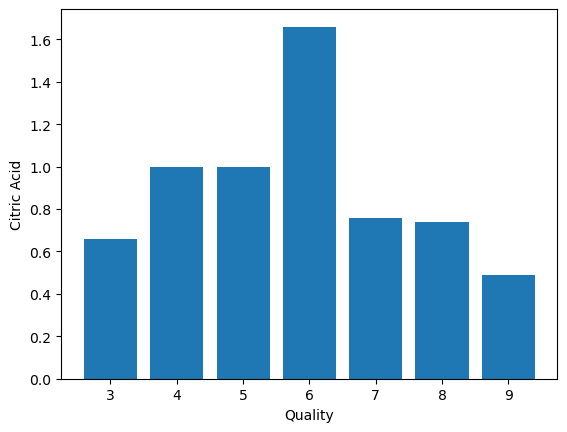

In [ ]:
#quality vs citric acid
plt.bar(wine_data['quality'], wine_data['citric acid'])
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()

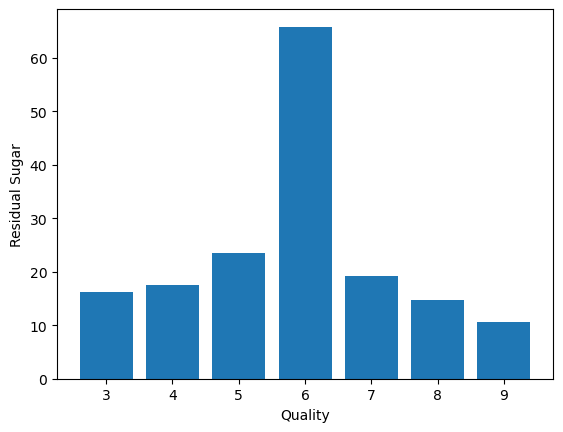

In [ ]:
#quality vs residual sugar
plt.bar(wine_data['quality'], wine_data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.show()

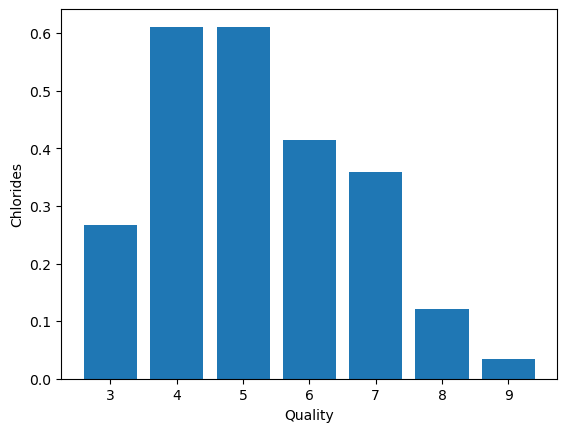

In [ ]:
#quality vs chlorides
plt.bar(wine_data['quality'], wine_data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

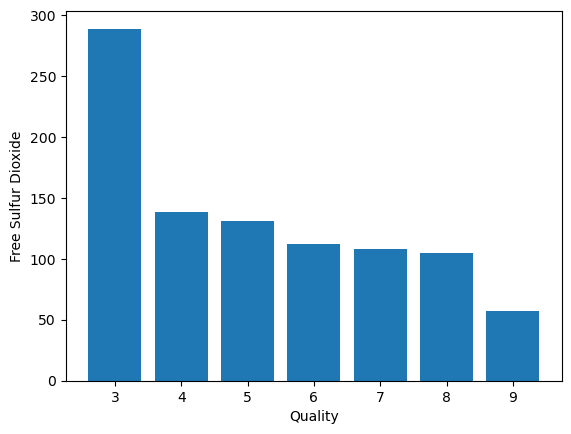

In [ ]:
#quality vs free sulfur dioxide
plt.bar(wine_data['quality'], wine_data['free sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

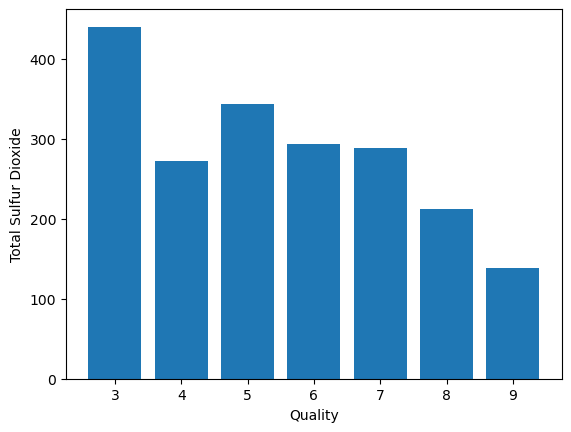

In [ ]:
#quality vs total sulfur dioxide
plt.bar(wine_data['quality'], wine_data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

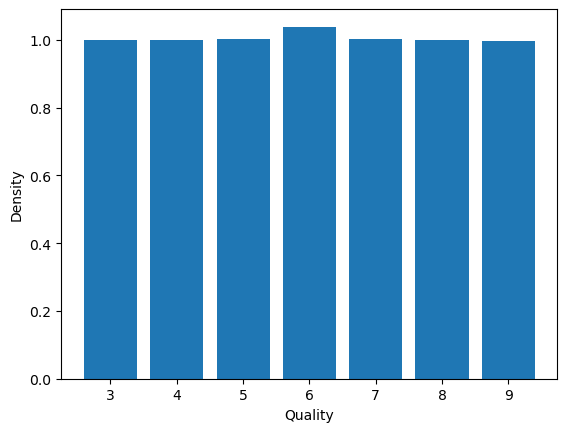

In [ ]:
#quality vs density
plt.bar(wine_data['quality'], wine_data['density'])
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

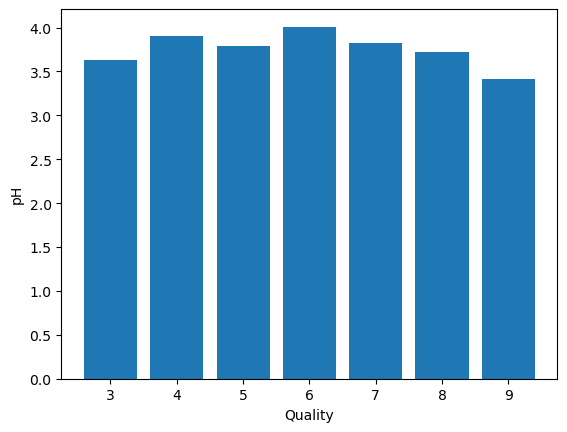

In [ ]:
#quality vs pH
plt.bar(wine_data['quality'], wine_data['pH'])
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

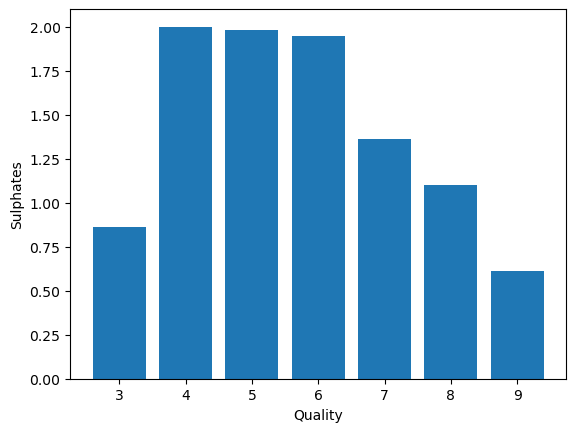

In [ ]:
#quality vs sulphates
plt.bar(wine_data['quality'], wine_data['sulphates'])
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.show()

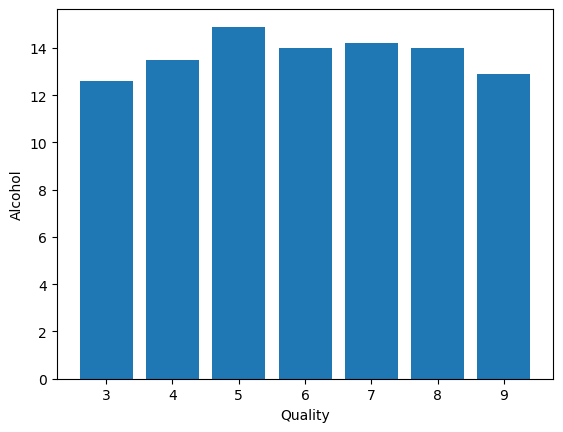

In [ ]:
#quality vs alcohol
plt.bar(wine_data['quality'], wine_data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

## Correlation Matrix

<AxesSubplot: >

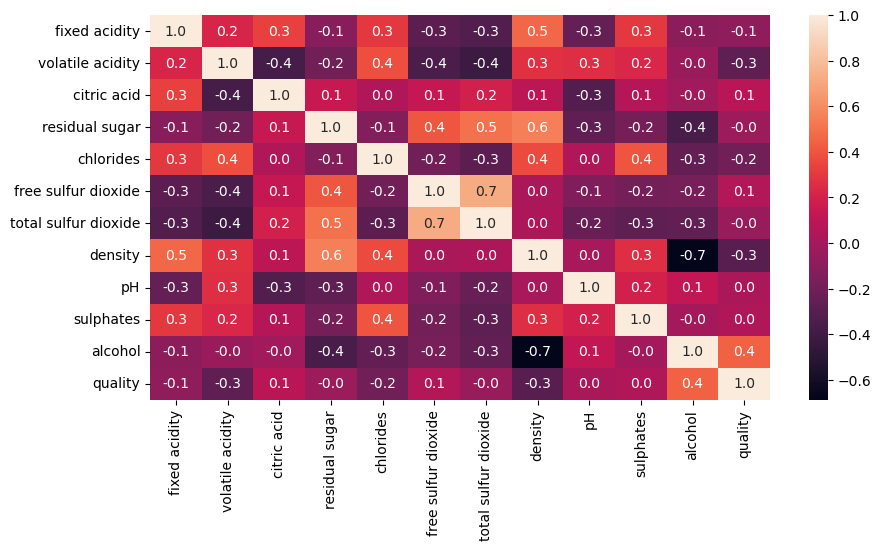

In [ ]:
#display correlation between quality and other variables
plt.figure(figsize = (10,5))
sns.heatmap(wine_data.corr(numeric_only = True), annot = True, fmt = '0.1f')

## Binarization Of Target Variable (Quality)

In [ ]:
#finding unique values
wine_data = pd.read_csv("winequalityN.csv")
wine_data.dropna(inplace = True)
wine_data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
#setting quality variable to 0 or 1 based on conditions
#1 means good quality, 0 means bad quality
wine_data['quality'] = [1 if x>=7 else 0 for x in wine_data['quality']]

In [ ]:
#verify binarization
wine_data['quality'].unique()

array([0, 1])

In [ ]:
#checking balance of dataset
wine_data['quality'].value_counts()

0    5192
1    1271
Name: quality, dtype: int64

<AxesSubplot: >

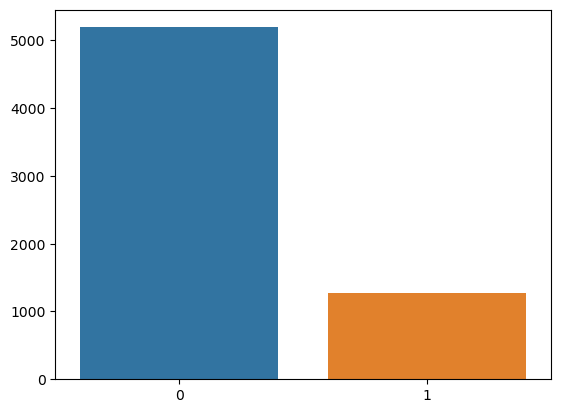

In [ ]:
#visualizer for imbalanced dataset
sns.barplot(x = wine_data['quality'].value_counts().index, y = wine_data['quality'].value_counts().values)

## Splitting Data

In [ ]:
#split data into x and y
wine_data.replace({'white':1,'red':0}, inplace = True)
X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [ ]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

## Handling The Imbalanced Dataset

In [ ]:
#use of oversampling

X_res, y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

0    5192
1    5192
Name: quality, dtype: int64

In [ ]:
#split data into training and testing datasets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.2)

In [ ]:
#view x train dataset
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2310,1,7.500000,0.230000,0.350000,17.800000,0.058000,128.000000,212.000000,1.002410,3.440000,0.430000,8.900000
5620,0,8.300000,0.650000,0.100000,2.900000,0.089000,17.000000,40.000000,0.998030,3.290000,0.550000,9.500000
9674,1,6.700000,0.480000,0.320000,1.400000,0.021000,22.000000,121.000000,0.988900,3.150000,0.530000,12.700000
6547,1,7.778358,0.385502,0.293833,3.793351,0.031533,30.616689,100.766623,0.991138,3.030665,0.316167,12.608344
8240,1,6.754811,0.239707,0.306443,5.430949,0.038155,37.000000,107.000000,0.992538,3.205858,0.525858,10.971131
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,7.200000,0.620000,0.060000,2.700000,0.077000,15.000000,85.000000,0.997460,3.510000,0.540000,9.500000
5191,0,9.300000,0.610000,0.260000,3.400000,0.090000,25.000000,87.000000,0.999750,3.240000,0.620000,9.700000
5390,0,9.800000,0.250000,0.490000,2.700000,0.088000,15.000000,33.000000,0.998200,3.420000,0.900000,10.000000
860,1,8.800000,0.360000,0.440000,1.900000,0.040000,9.000000,121.000000,0.995300,3.190000,0.480000,9.900000


In [ ]:
#view y train dataset
y_train

2310    0
5620    0
9674    1
6547    1
8240    1
       ..
5734    0
5191    0
5390    0
860     0
7270    1
Name: quality, Length: 8307, dtype: int64

## Feature Scaling

In [ ]:
#use of feature scaling to put features into same scale
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

## Choosing Models
Testing the accuracy, precision, recall, and f1 scores of the Logistic Regression, K Neighbors, and Random Forest based models

## Logistic Regression

In [ ]:
#Implementation of Logistic Regression algorithm
#fitting algorithm around training data
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#forming predictions using test data
y_pred1 = log.predict(X_test)

In [ ]:
#percentage of correct predictions
accuracy_score(y_test, y_pred1)

0.7573423206547906

In [ ]:
#how well positive class predicted
precision_score(y_test, y_pred1)

0.7330396475770925

In [ ]:
#how well model correctly predict the positives out of actual positives
recall_score(y_test, y_pred1)

0.8054211035818006

In [ ]:
#combination of precision and recall
f1_score(y_test, y_pred1)

0.7675276752767529

## KNN

In [ ]:
#Implementation of K Neighbors Classifier algorithm
#fitting algorithm around training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.8550794415021666

In [ ]:
precision_score(y_test, y_pred2)

0.7990196078431373

In [ ]:
recall_score(y_test, y_pred2)

0.9467570183930301

In [ ]:
f1_score(y_test, y_pred2)

0.8666371289322109

## Random Forest

In [ ]:
#Implementation of Random Forest algorithm
#fitting algorithm around training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.915743861338469

In [ ]:
precision_score(y_test, y_pred3)

0.9001865671641791

In [ ]:
recall_score(y_test, y_pred3)

0.9341723136495643

In [ ]:
f1_score(y_test, y_pred3)

0.9168646080760094

In [ ]:
#create dataframe to store scores
final_data = pd.DataFrame({'Model': ['LR', 'KNN', 'RF'],
             'ACC': [accuracy_score(y_test, y_pred1)*100,
                    accuracy_score(y_test, y_pred2)*100,
                    accuracy_score(y_test, y_pred3)*100]})

<AxesSubplot: xlabel='Model', ylabel='ACC'>

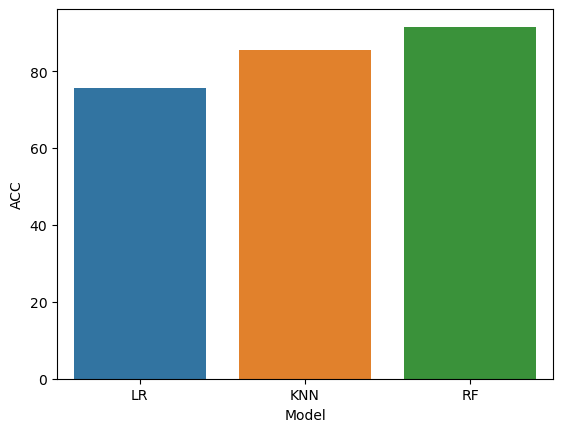

In [ ]:
#visualization of dataframe
sns.barplot(x = final_data['Model'], y = final_data['ACC'])

## Save Model
The Random Forest Model is clearly the best option based on all scores.  We will now save that model

In [ ]:
X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [ ]:
X_res, y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

0    5192
1    5192
Name: quality, dtype: int64

In [ ]:
st = StandardScaler()
X = st.fit_transform(X_res)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X, y_res)

RandomForestClassifier()

In [ ]:
joblib.dump(rf, 'wine_quality_prediction_model')

['wine_quality_prediction_model']

In [ ]:
model = joblib.load('wine_quality_prediction_model')

## Evaluating Performance

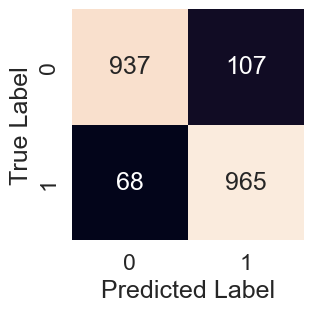

In [ ]:
sns.set(font_scale = 1.5)

#function to create confusion matrix
#tool that can be used for future confusion matrices to evaluate performance
def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cbar = False, fmt = 'g')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_pred3)

## Introducing New Data
The model will now form a prediction of the wine quality based on new data

In [ ]:
new_data = pd.DataFrame({'type': 1,
                        'fixed acidity': 7.5,
                        'volatile acidity': 0.55,
                        'citric acid': 0.06,
                        'residual sugar': 1.0,
                        'chlorides': 0.072,
                        'free sulfur dioxide': 15.0,
                        'total sulfur dioxide': 30.0,
                        'density': 0.9957,
                        'pH': 3.34,
                        'sulphates': 0.52,
                        'alcohol': 10.9,}, index = [0])

new_data

NameError: ignored

In [ ]:
test = st.transform(new_data)
p = model.predict(test)

In [ ]:
#displays if wine is good or bad quality based on data values
if p[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine


## User Interface
Run the cell below and input values to be used for a prediction

In [ ]:
t = input("Wine Type (Enter 0 for red, 1 for white): ")
fa = input("Fixed Acidity: ")
va = input("Volatile Acidity: ")
ca = input("Citric Acid: ")
rs = input("Residual Sugar: ")
ch = input("Chlorides: ")
fs = input("Free Sulfur Dioxide: ")
ts = input("Total Sulfur Dioxide: ")
d = input("Density: ")
ph = input("pH: ")
su = input("Sulphates: ")
al = input("Alcohol Level: ")

Wine Type (Enter 0 for red, 1 for white): 1
Fixed Acidity: 6.2
Volatile Acidity: 0.66
Citric Acid: 0.48
Residual Sugar: 1.2
Chlorides: 0.029
Free Sulfur Dioxide: 29.0
Total Sulfur Dioxide: 75.0
Density: 0.9892
pH: 3.33
Sulphates: 0.39
Alcohol Level: 12.8


In [ ]:
input_data = pd.DataFrame({'type': t,
                        'fixed acidity': fa,
                        'volatile acidity': va,
                        'citric acid': ca,
                        'residual sugar': rs,
                        'chlorides': ch,
                        'free sulfur dioxide': fs,
                        'total sulfur dioxide': ts,
                        'density': d,
                        'pH': ph,
                        'sulphates': su,
                        'alcohol': al,}, index = [0])

input_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8


In [ ]:
test1 = st.transform(input_data)
p1 = model.predict(test1)
if p1[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine
